In [18]:
# Step 0. Import libraries and set base path
import pandas as pd
import numpy as np
from scipy.io import arff

path = r"C:\Users\Admin\Desktop\COGS118_FinalProject\data"

In [19]:
# Step 1. Dataset Preview 

breast_raw = pd.read_csv(path + r"\breast_cancer.data", header=None)
print("Breast cancer raw shape:", breast_raw.shape)

cervical_raw = pd.read_csv(path + r"\cervical_cancer.csv")
print("Cervical cancer raw shape:", cervical_raw.shape)

data, meta = arff.loadarff(path + r"\eeg_eye_state.arff")
eeg_raw = pd.DataFrame(data)
print("EEG Eye State raw shape:", eeg_raw.shape)

parkinsons_raw = pd.read_csv(path + r"\parkinsons_updrs.data", header=None)
print("Parkinsons raw shape:", parkinsons_raw.shape)


Breast cancer raw shape: (699, 11)
Cervical cancer raw shape: (858, 36)
EEG Eye State raw shape: (14980, 15)
Parkinsons raw shape: (5876, 22)


In [20]:
# Step 2A. Clean Breast Cancer Dataset

breast_path = path + r"\breast_cancer.data"
breast = pd.read_csv(breast_path, header=None)

# Assign column names
breast_columns = [
    "Sample_code_number", "Clump_thickness", "Uniformity_of_cell_size",
    "Uniformity_of_cell_shape", "Marginal_adhesion", "Single_epithelial_cell_size",
    "Bare_nuclei", "Bland_chromatin", "Normal_nucleoli", "Mitoses", "Class"
]
breast.columns = breast_columns

# Replace '?' with NaN
breast = breast.replace("?", np.nan)

# Convert to numeric
breast = breast.apply(pd.to_numeric)

# Drop rows with missing values
breast_clean = breast.dropna()

print("Original shape:", breast.shape)
print("Cleaned shape:", breast_clean.shape)

# Save cleaned CSV
breast_clean.to_csv(path + r"\breast_cancer_clean.csv", index=False)


Original shape: (699, 11)
Cleaned shape: (683, 11)


In [36]:
# Step 2B. Clean Cervical Cancer Dataset

import pandas as pd
import numpy as np

# 1. Load raw cervical cancer dataset
cervical_path = path + r"\cervical_cancer.csv"
cerv = pd.read_csv(cervical_path)

print("Original cervical cancer shape:", cerv.shape)

# 2. Convert all to numeric
cerv = cerv.apply(pd.to_numeric, errors="coerce")

# 3. Choose target column
#     We use: Biopsy (0 = no cancer, 1 = cancer)
target_col = "Biopsy"

# 4. Fill missing values
#    Median works best for skewed medical data
cerv = cerv.fillna(cerv.median(numeric_only=True))

# 5. Remove rows missing target
cerv = cerv.dropna(subset=[target_col])

# 6. Save cleaned dataset
clean_path = path + r"\cervical_cancer_clean.csv"
cerv.to_csv(clean_path, index=False)

print("Cleaned cervical cancer shape:", cerv.shape)
print("Saved cleaned dataset as:", clean_path)


Original cervical cancer shape: (858, 36)
Cleaned cervical cancer shape: (858, 36)
Saved cleaned dataset as: C:\Users\Admin\Desktop\COGS118_FinalProject\data\cervical_cancer_clean.csv


In [40]:
from scipy.io import arff
import pandas as pd

path = r"C:\Users\Admin\Desktop\COGS118_FinalProject\data\eeg_eye_state.arff"

# 1. Load ARFF
data, meta = arff.loadarff(path)

# 2. Convert to pandas DataFrame
df = pd.DataFrame(data)

# 3. Convert bytes to string if needed (for the label)
df["eyeDetection"] = df["eyeDetection"].astype(int)

# 4. Check missing values
print(df.isna().sum())

# 5. Save as CSV for later analysis
out_path = r"C:\Users\Admin\Desktop\COGS118_FinalProject\data\eeg_clean.csv"
df.to_csv(out_path, index=False)

print("EEG cleaned dataset saved to:", out_path)
print("Shape:", df.shape)


AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64
EEG cleaned dataset saved to: C:\Users\Admin\Desktop\COGS118_FinalProject\data\eeg_clean.csv
Shape: (14980, 15)


In [45]:
import pandas as pd

# Step 2D. Clean Parkinson Dataset

path = r"C:\Users\Admin\Desktop\COGS118_FinalProject\data\parkinsons_updrs.data"

# Load dataset (first row IS header)
df = pd.read_csv(path, header=0, skipinitialspace=True)

# Ensure all values are numeric (remove stray spaces)
df = df.apply(pd.to_numeric, errors="coerce")

print("Null values per column:")
print(df.isna().sum())

# Drop rows with any missing numeric values (UPDRS dataset is clean)
df = df.dropna()

# Create binary classification: high vs low motor_UPDRS
median_val = df["motor_UPDRS"].median()

df["motor_UPDRS_binary"] = (df["motor_UPDRS"] > median_val).astype(int)

# Save clean dataset
out_path = r"C:\Users\Admin\Desktop\COGS118_FinalProject\data\parkinsons_clean.csv"
df.to_csv(out_path, index=False)

print("Parkinson cleaned dataset saved to:", out_path)
print("Shape:", df.shape)


Null values per column:
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64
Parkinson cleaned dataset saved to: C:\Users\Admin\Desktop\COGS118_FinalProject\data\parkinsons_clean.csv
Shape: (5875, 23)


In [25]:
# Step 3. Define classifiers to test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

def get_classifiers():
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=500),
        "SVM (RBF)": SVC(kernel="rbf"),
        "Random Forest": RandomForestClassifier(n_estimators=200),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Naive Bayes": GaussianNB()
    }
    return classifiers




In [31]:
# Step 4A. Universal Evaluation Function (3 splits × 3 runs)

def evaluate_dataset(df, target_col, dataset_name="Dataset"):
    print("\n===== Evaluating", dataset_name, "=====")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    classifiers = get_classifiers()
    scaler = StandardScaler()
    final_results = {}

    splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]

    for clf_name, clf in classifiers.items():
        results = []

        for train_ratio, test_ratio in splits:
            run_acc = []

            for _ in range(3):  # 3 runs
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, train_size=train_ratio, shuffle=True
                )

                # Scale training data
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                clf.fit(X_train_scaled, y_train)
                acc = clf.score(X_test_scaled, y_test)
                run_acc.append(acc)

            results.append(np.mean(run_acc))

        final_results[clf_name] = results
        print(f"{clf_name}: {results}")

    return final_results



In [34]:
# Step 4B. Hyperparameter Heatmap for SVM (single dataset)

def plot_svm_heatmap(C_values, gamma_values, accuracy_matrix, dataset_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        accuracy_matrix,
        xticklabels=gamma_values,
        yticklabels=C_values,
        annot=True, fmt=".3f",
        cmap="viridis"
    )
    plt.xlabel("Gamma")
    plt.ylabel("C")
    plt.title(f"SVM Hyperparameter Heatmap - {dataset_name}")
    plt.show()



===== Evaluating Breast Cancer =====
Logistic Regression: [np.float64(0.9628275441803779), np.float64(0.9639376218323586), np.float64(0.9805352798053528)]
SVM (RBF): [np.float64(0.9646556977452772), np.float64(0.9610136452241714), np.float64(0.9683698296836983)]
Random Forest: [np.float64(0.9670932358318098), np.float64(0.9678362573099415), np.float64(0.9805352798053528)]
KNN: [np.float64(0.9725776965265083), np.float64(0.9668615984405458), np.float64(0.9659367396593673)]
Naive Bayes: [np.float64(0.9494210847044485), np.float64(0.9473684210526315), np.float64(0.9659367396593673)]


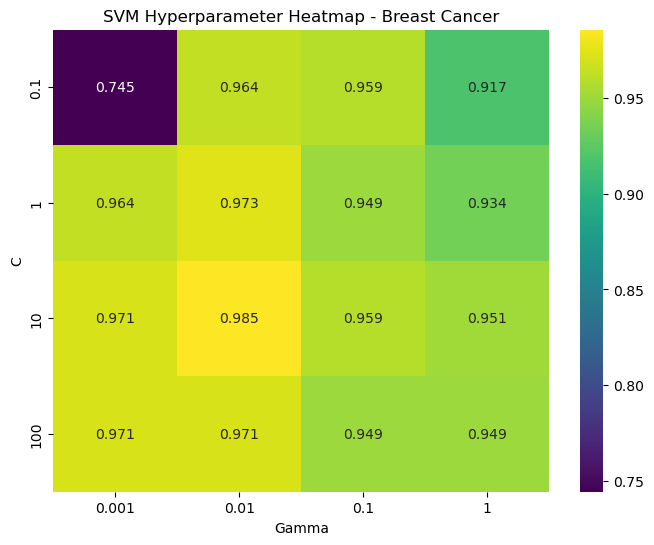

In [35]:
# Step 5A. Run Classifiers on Breast Cancer Dataset
bc = pd.read_csv(path + r"\breast_cancer_clean.csv")

breast_results = evaluate_dataset(
    bc,
    target_col="Class",
    dataset_name="Breast Cancer"
)

# Step 5A-2. Run SVM Hyperparameter Heatmap (Bonus)

C_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]

accuracy_matrix = np.zeros((len(C_values), len(gamma_values)))

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = bc.drop(columns=["Class"])
y = bc["Class"]

scaler = StandardScaler()

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):

        acc_list = []

        for _ in range(3):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, train_size=0.8, shuffle=True
            )

            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model = SVC(kernel="rbf", C=C, gamma=gamma)
            model.fit(X_train_scaled, y_train)
            acc_list.append(model.score(X_test_scaled, y_test))

        accuracy_matrix[i][j] = np.mean(acc_list)

# ---- Call heatmap plot (your Step 4B function) ----
plot_svm_heatmap(C_values, gamma_values, accuracy_matrix, "Breast Cancer")


In [38]:
def get_classifiers():
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=500),
        "SVM (RBF, tuned)": SVC(kernel="rbf", C=10, gamma=0.01),   #changed the parameters based on heatmap result
        "Random Forest": RandomForestClassifier(n_estimators=200),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Naive Bayes": GaussianNB()
    }
    return classifiers


In [54]:
bc = pd.read_csv(r"C:\Users\Admin\Desktop\COGS118_FinalProject\data\breast_cancer_clean.csv")


breast_results = evaluate_dataset(
    bc,
    target_col="Class",
    dataset_name="Breast Cancer"
)



===== Evaluating Breast Cancer =====
Logistic Regression: [np.float64(0.9567336989640464), np.float64(0.9639376218323586), np.float64(0.956204379562044)]
SVM (RBF, tuned): [np.float64(0.9664838513101767), np.float64(0.9678362573099415), np.float64(0.9708029197080292)]
Random Forest: [np.float64(0.9744058500914076), np.float64(0.9736842105263158), np.float64(0.9756690997566911)]
KNN: [np.float64(0.9737964655697745), np.float64(0.9707602339181287), np.float64(0.956204379562044)]
Naive Bayes: [np.float64(0.9542961608775137), np.float64(0.9600389863547759), np.float64(0.9464720194647201)]


In [39]:
# Step 5B. Run Classifiers on Cervical Cancer Dataset

cervical = pd.read_csv(path + r"\cervical_cancer_clean.csv")

cervical_results = evaluate_dataset(
    cervical,
    target_col="Biopsy",      
    dataset_name="Cervical Cancer"
)



===== Evaluating Cervical Cancer =====
Logistic Regression: [np.float64(0.9456574478408539), np.float64(0.9487179487179488), np.float64(0.9437984496124031)]
SVM (RBF, tuned): [np.float64(0.9451722464822901), np.float64(0.9502719502719503), np.float64(0.9515503875968992)]
Random Forest: [np.float64(0.9442018437651626), np.float64(0.9557109557109557), np.float64(0.9534883720930233)]


C:\Users\Admin\anaconda3\envs\COGS118A\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


KNN: [np.float64(0.940320232896652), np.float64(0.9432789432789432), np.float64(0.9321705426356589)]
Naive Bayes: [np.float64(0.4206695778748181), np.float64(0.10878010878010878), np.float64(0.09496124031007751)]


In [42]:
# Step 5C. Run Classifiers on EEG Eye State Dataset
eeg = pd.read_csv(r"C:\Users\Admin\Desktop\COGS118_FinalProject\data\eeg_clean.csv")

eeg_results = evaluate_dataset(
    eeg,
    target_col="eyeDetection",
    dataset_name="EEG Eye State"
)



===== Evaluating EEG Eye State =====
Logistic Regression: [np.float64(0.6264741878059635), np.float64(0.618958611481976), np.float64(0.5897863818424566)]
SVM (RBF, tuned): [np.float64(0.7302236315086782), np.float64(0.6858923008455718), np.float64(0.6866933689363596)]
Random Forest: [np.float64(0.8787550066755675), np.float64(0.9138406764574989), np.float64(0.9274588340008901)]
KNN: [np.float64(0.9084334668446817), np.float64(0.875522919448153), np.float64(0.8886292834890965)]
Naive Bayes: [np.float64(0.5388295505117936), np.float64(0.48807298620382733), np.float64(0.4583889630618603)]


In [46]:
# Step 5D. Run Classifiers on Parkinson Dataset

par = pd.read_csv(r"C:\Users\Admin\Desktop\COGS118_FinalProject\data\parkinsons_clean.csv")

parkinson_results = evaluate_dataset(
    par,
    target_col="motor_UPDRS_binary",
    dataset_name="Parkinson"
)

print("\nFinal results for Parkinson dataset:")
for model, scores in parkinson_results.items():
    print(model, scores)



===== Evaluating Parkinson =====
Logistic Regression: [np.float64(0.9891489361702127), np.float64(0.9896755162241888), np.float64(0.9934751773049646)]
SVM (RBF, tuned): [np.float64(0.9788652482269504), np.float64(0.987066031313819), np.float64(0.9909219858156028)]
Random Forest: [np.float64(0.9995744680851063), np.float64(1.0), np.float64(1.0)]
KNN: [np.float64(0.959645390070922), np.float64(0.9693669162695712), np.float64(0.9741843971631207)]
Naive Bayes: [np.float64(0.9248936170212767), np.float64(0.9277286135693216), np.float64(0.9032624113475176)]

Final results for Parkinson dataset:
Logistic Regression [np.float64(0.9891489361702127), np.float64(0.9896755162241888), np.float64(0.9934751773049646)]
SVM (RBF, tuned) [np.float64(0.9788652482269504), np.float64(0.987066031313819), np.float64(0.9909219858156028)]
Random Forest [np.float64(0.9995744680851063), np.float64(1.0), np.float64(1.0)]
KNN [np.float64(0.959645390070922), np.float64(0.9693669162695712), np.float64(0.97418439716

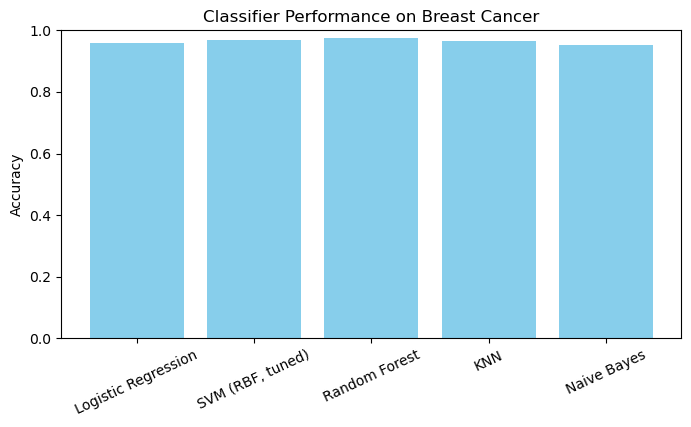

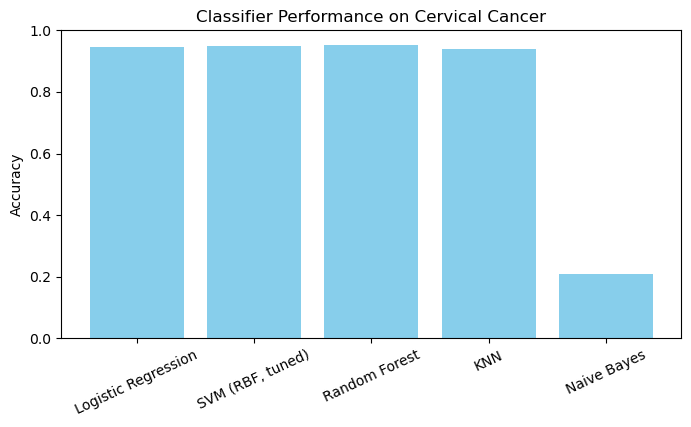

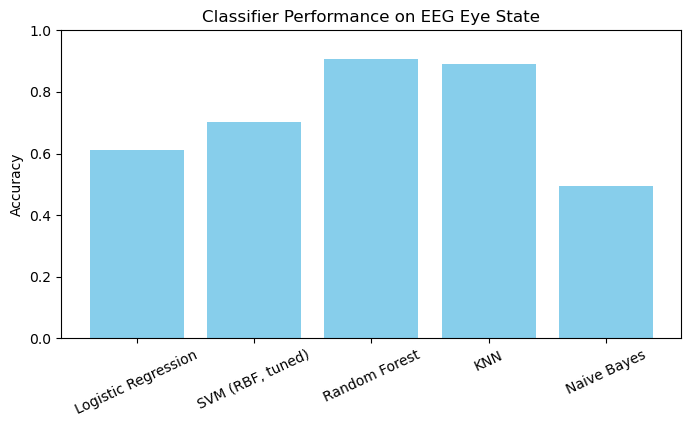

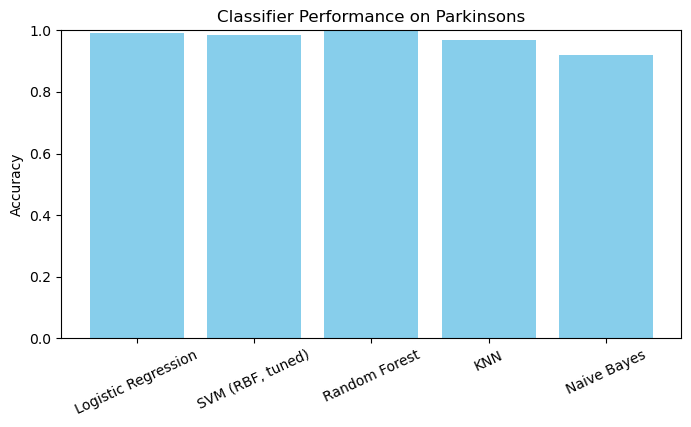

In [55]:
# Step 6. Bar chart for one dataset
import matplotlib.pyplot as plt

def plot_dataset_results(results_dict, dataset_name):
    """
    results_dict: {"Logistic Regression": [acc1, acc2, acc3], ...}
    dataset_name: string
    """
    models = list(results_dict.keys())
    means = [np.mean(results_dict[m]) for m in models]

    plt.figure(figsize=(8,4))
    plt.bar(models, means, color="skyblue")
    plt.ylabel("Accuracy")
    plt.title(f"Classifier Performance on {dataset_name}")
    plt.xticks(rotation=25)
    plt.ylim(0,1)
    plt.show()

plot_dataset_results(breast_results, "Breast Cancer")
plot_dataset_results(cervical_results, "Cervical Cancer")
plot_dataset_results(eeg_results, "EEG Eye State")
plot_dataset_results(parkinson_results, "Parkinsons")


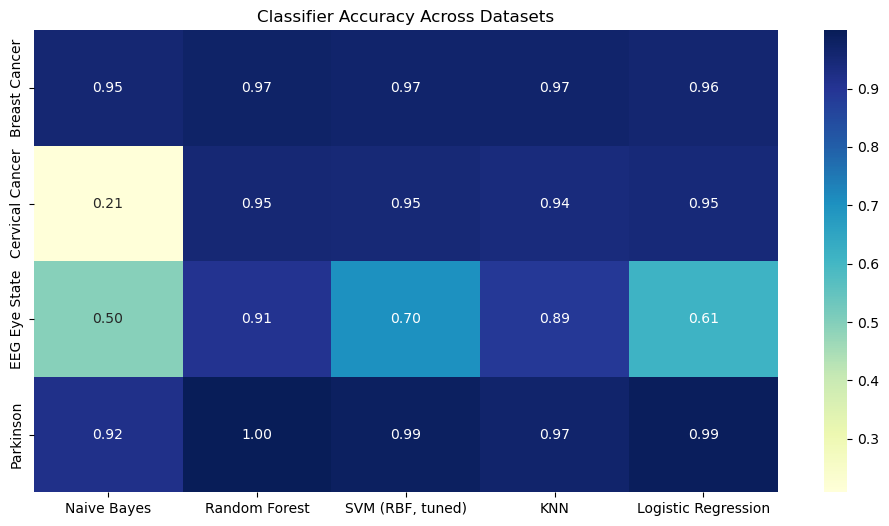

In [56]:
# Step 7. Heatmap for accuracy across all datasetsLR
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_heatmap_data(results_dicts, dataset_names):
    """
    results_dicts: [breast_results, cervical_results, eeg_results, parkinson_results]
    dataset_names: ["Breast Cancer", "Cervical Cancer", "EEG Eye State", "Parkinson"]
    """
    # Step 1: Collect all unique model names across datasets
    all_models = set()
    for r in results_dicts:
        all_models.update(r.keys())
    all_models = list(all_models)   # unified model order

    heatmap_matrix = []

    # Step 2: For each dataset, compute mean accuracy in the unified model order
    for results in results_dicts:
        row = []
        for m in all_models:
            if m in results:
                row.append(np.mean(results[m]))
            else:
                row.append(np.nan)   # fill missing model with NaN
        heatmap_matrix.append(row)

    # Step 3: Convert to DataFrame
    df_heat = pd.DataFrame(
        heatmap_matrix,
        index=dataset_names,
        columns=all_models
    )
    return df_heat

# ---- RUN HEATMAP ----

dataset_names = ["Breast Cancer", "Cervical Cancer", "EEG Eye State", "Parkinson"]
results_list = [breast_results, cervical_results, eeg_results, parkinson_results]

df_heat = prepare_heatmap_data(results_list, dataset_names)

plt.figure(figsize=(12,6))
sns.heatmap(df_heat, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Classifier Accuracy Across Datasets")
plt.show()



In [75]:
import pandas as pd
import numpy as np

def results_to_table(results_dict, dataset_name):
    """
    Convert a dict of model → [acc1, acc2, acc3] into a clean table.
    """
    df = pd.DataFrame(results_dict).T  # models become rows
    df.columns = ["Split 20/80", "Split 50/50", "Split 80/20"]
    df["Mean Accuracy"] = df.mean(axis=1)
    df.insert(0, "Dataset", dataset_name)
    df.index.name = "Model"
    return df

# Create individual tables
breast_table = results_to_table(breast_results, "Breast Cancer")
cervical_table = results_to_table(cervical_results, "Cervical Cancer")
eeg_table = results_to_table(eeg_results, "EEG Eye State")
parkinson_table = results_to_table(parkinson_results, "Parkinson")

# Combine all datasets into one big table (optional for appendix)
all_results_table = pd.concat([
    breast_table, cervical_table, eeg_table, parkinson_table
])

# Show the final table
print(all_results_table)

# Save to CSV for your report
all_results_table.to_csv("model_results_summary.csv")


                             Dataset  Split 20/80  Split 50/50  Split 80/20  \
Model                                                                         
Logistic Regression    Breast Cancer     0.956734     0.963938     0.956204   
SVM (RBF, tuned)       Breast Cancer     0.966484     0.967836     0.970803   
Random Forest          Breast Cancer     0.974406     0.973684     0.975669   
KNN                    Breast Cancer     0.973796     0.970760     0.956204   
Naive Bayes            Breast Cancer     0.954296     0.960039     0.946472   
Logistic Regression  Cervical Cancer     0.945657     0.948718     0.943798   
SVM (RBF, tuned)     Cervical Cancer     0.945172     0.950272     0.951550   
Random Forest        Cervical Cancer     0.944202     0.955711     0.953488   
KNN                  Cervical Cancer     0.940320     0.943279     0.932171   
Naive Bayes          Cervical Cancer     0.420670     0.108780     0.094961   
Logistic Regression    EEG Eye State     0.626474   

In [58]:
import pandas as pd
import numpy as np

# Put all results into a dictionary of datasets
all_results = {
    "Breast Cancer": breast_results,
    "Cervical Cancer": cervical_results,
    "EEG Eye State": eeg_results,
    "Parkinson": parkinson_results
}

# Prepare list for table rows
rows = []

for dataset_name, results_dict in all_results.items():
    for model_name, acc_list in results_dict.items():
        mean_acc = np.mean(acc_list)
        rows.append([dataset_name, model_name, mean_acc])

# Convert to DataFrame
df_summary = pd.DataFrame(rows, columns=["Dataset", "Classifier", "Mean Accuracy"])

# Pivot table: datasets × classifiers
df_pivot = df_summary.pivot(index="Dataset", columns="Classifier", values="Mean Accuracy")

print(df_pivot)


Classifier            KNN  Logistic Regression  Naive Bayes  Random Forest  \
Dataset                                                                      
Breast Cancer    0.966920             0.958959     0.953602       0.974586   
Cervical Cancer  0.938590             0.946058     0.208137       0.951134   
EEG Eye State    0.890862             0.611740     0.495097       0.906685   
Parkinson        0.967732             0.990767     0.918628       0.999858   

Classifier       SVM (RBF, tuned)  
Dataset                            
Breast Cancer            0.968374  
Cervical Cancer          0.948998  
EEG Eye State            0.700936  
Parkinson                0.985618  


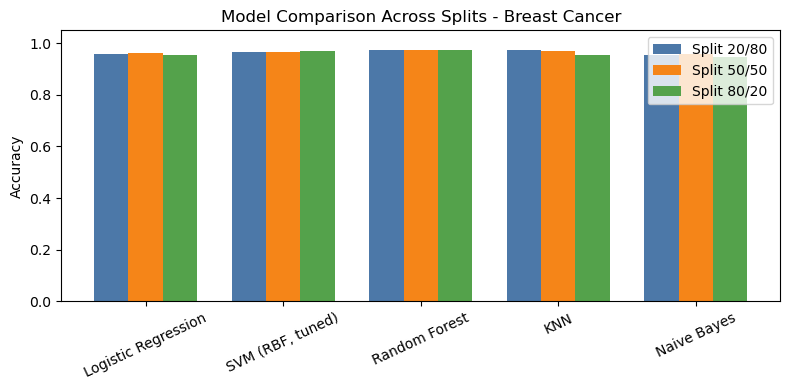

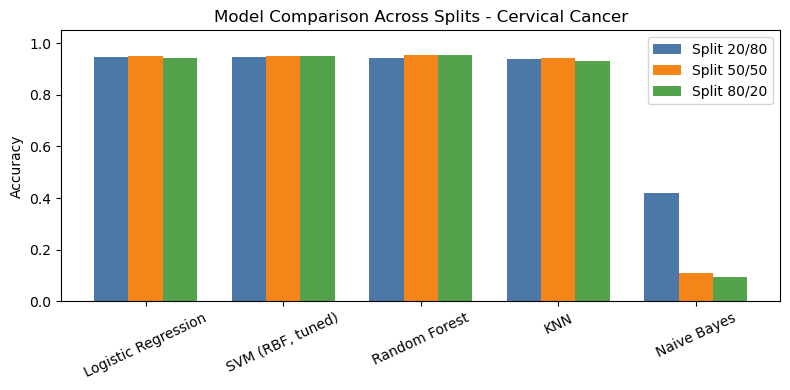

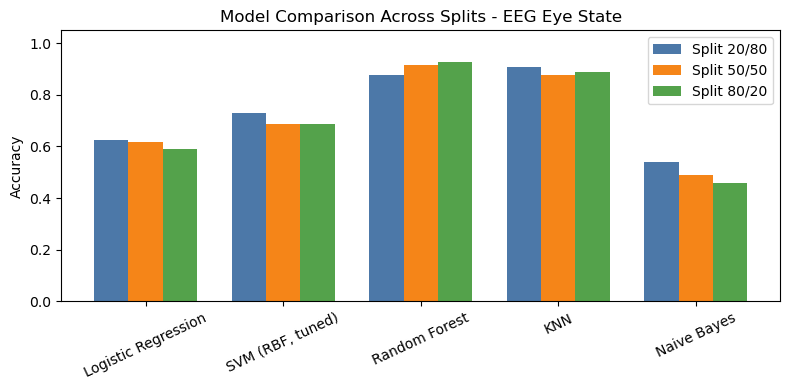

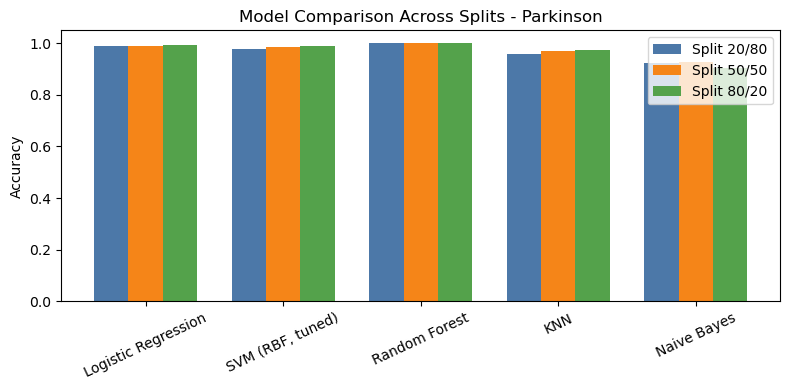

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_table = all_results_table.reset_index().rename(columns={"index": "Model"})

splits = ["Split 20/80", "Split 50/50", "Split 80/20"]

datasets = df_table["Dataset"].unique()
colors = ["#4C78A8", "#F58518", "#54A24B"]



for ds in datasets:
    df_ds = df_table[df_table["Dataset"] == ds]

    x = np.arange(len(df_ds))          
    width = 0.25                      

    plt.figure(figsize=(8, 4))

    for i, split in enumerate(splits):
        plt.bar(x + i*width,
                df_ds[split],
                width=width,
                label=split,color=colors[i]
)

    plt.xticks(x + width, df_ds["Model"], rotation=25)
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.05)

    plt.title(f"Model Comparison Across Splits - {ds}")
    plt.legend()
    plt.tight_layout()
    plt.show()



In [80]:
from scipy.stats import friedmanchisquare

LR  = [0.956734, 0.963938, 0.956204]
SVM = [0.966484, 0.967836, 0.970803]
RF  = [0.974406, 0.973684, 0.975669]
KNN = [0.973796, 0.970760, 0.956204]
NB  = [0.954296, 0.960039, 0.946472]

stat, p = friedmanchisquare(LR, SVM, RF, KNN, NB)
print("Breast Cancer:", stat, p)

LR  = [0.945657, 0.948718, 0.943798]
SVM = [0.945172, 0.950272, 0.951550]
RF  = [0.944202, 0.955711, 0.953488]
KNN = [0.940320, 0.943279, 0.932171]
NB  = [0.420670, 0.108780, 0.094961]

stat, p = friedmanchisquare(LR, SVM, RF, KNN, NB)
print("Cervical Cancer:", stat, p)

LR  = [0.624674, 0.618959, 0.589786]
SVM = [0.730224, 0.685892, 0.686693]
RF  = [0.878755, 0.913841, 0.927459]
KNN = [0.908433, 0.875523, 0.888629]
NB  = [0.538830, 0.488073, 0.458389]

stat, p = friedmanchisquare(LR, SVM, RF, KNN, NB)
print("EEG Eye State:", stat, p)

LR  = [0.989149, 0.989676, 0.993475]
SVM = [0.978865, 0.987066, 0.990922]
RF  = [0.999574, 1.000000, 1.000000]
KNN = [0.959645, 0.969367, 0.974184]
NB  = [0.924894, 0.927729, 0.903262]

stat, p = friedmanchisquare(LR, SVM, RF, KNN, NB)
print("Parkinson:", stat, p)


Breast Cancer: 11.050847457627112 0.025998463511159992
Cervical Cancer: 9.866666666666667 0.04273456656933023
EEG Eye State: 11.466666666666669 0.02179089585829388
Parkinson: 12.0 0.01735126523666451
